In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv

from analysis import count_unique_sites
from analysis import get_site

Load in the metadata.

In [2]:
column_names = ["Index", "URL", "Headline", "Year", "Category", "April Fool", "Set"]
meta = pd.read_csv("../Corpus Construction/meta.csv", delimiter=";", header=None, names=column_names)
meta.set_index('Index', inplace=True)

Plot the distribution of sites.

In [3]:
af = meta.loc[meta['April Fool'] == "Y"]
naf = meta.loc[meta['April Fool'] == "N"]

In [4]:
af_sites = af.groupby(af['URL'].apply(get_site), sort=False).size()
af_sites = af_sites.sort_values(ascending=False)

In [5]:
naf_sites = naf.groupby(naf['URL'].apply(get_site), sort=False).size()
naf_sites = naf_sites.sort_values(ascending=False)

In [6]:
meta_sites = meta.groupby(meta['URL'].apply(get_site), sort=False).size()
meta_sites = meta_sites.sort_values(ascending=False)

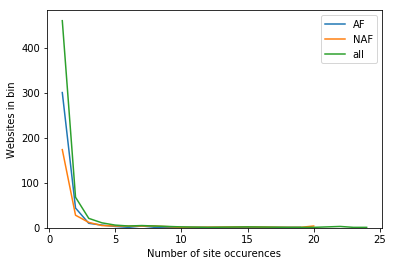

In [7]:
a = af_sites.value_counts().sort_index()
b = naf_sites.value_counts().sort_index()
c = meta_sites.value_counts().sort_index()

fig, ax = plt.subplots()
# Need to try and set bottom axis to article index of AF.

ax = a.plot(ax=ax, label='AF')
ax = b.plot(ax=ax, label='NAF')
ax = c.plot(ax=ax, label='all')
# ax.set_xlim(xmin=0)
ax.set_ylim(ymin=0)
ax.set_ylabel("Websites in bin")
ax.set_xlabel("Number of site occurences")

plt.legend()

plt.show()

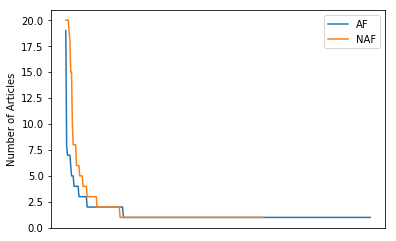

In [8]:
fig, ax = plt.subplots()
ax.get_xaxis().set_visible(False)
# Need to try and set bottom axis to article index of AF.

ax = af_sites.plot(ax=ax, label='AF')
ax = naf_sites.plot(ax=ax, label='NAF')
# ax.set_xlim(xmin=0)
ax.set_ylim(ymin=0)
ax.set_ylabel("Number of Articles")
ax.set_xlabel("Sites")

plt.legend()
plt.show()

Plot the distribution of years

In [9]:
fig, ax = plt.subplots()

year_counts = af.groupby(["Year"]).size()

year_counts.plot(ax=ax)
ax.set_ylabel("Number of Articles")
ax.set_ylim(ymin=0)
plt.show()

In [10]:
meta.describe()

Year
count  1038.00000
mean   2010.99422
std       3.57614
min    2004.00000
25%    2009.00000
50%    2010.00000
75%    2014.00000
max    2018.00000

In [14]:
print("Number of Sites AF:\t{}".format(len(af_sites)))
print("Number of Sites NAF:\t{}".format(len(naf_sites)))

Number of Sites AF:	371
Number of Sites NAF:	240


In [15]:
print("Number of Articles:\t{}".format(len(af)))

Number of Articles:	519


Print number of words for AF and NAF

In [41]:
def get_lengths(x):
    lengths = []
    for i in x.index:
        with open("../Tagged_Corpus/{0}/{0}.txt.pos.sem.wrd.fql".format(i)) as file:
            line = file.readline()
        words = int(line.split(" ")[-1].strip())
        lengths.append(words)
    return np.array(lengths)

lengths_af = get_lengths(af)
lengths_naf = get_lengths(naf)

print("Number of Words AF:\t{}".format(lengths_af.sum()))
print("Number of Words NAF:\t{}".format(lengths_naf.sum()))

print("Words Mean AF:\t{}".format(lengths_af.mean()))
print("Words Mean NAF:\t{}".format(lengths_naf.mean()))

print("Words Std AF:\t{}".format(lengths_af.std()))
print("Words Std NAF:\t{}".format(lengths_naf.std()))

Number of Words AF:	213781
Number of Words NAF:	344917
Words Mean AF:	411.9094412331407
Words Mean NAF:	664.5799614643545
Words Std AF:	326.9401692441464
Words Std NAF:	633.2248265708952


In [40]:
lengths_naf.mean()

664.5799614643545